In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Positive Datasets

In [239]:
outfiles = [f for f in os.listdir() if '_out.csv' in f]
outfiles
# formated in data_extraction.ipynb & scraping.ipynb

['InverPep_out.csv',
 'AntiTbPdb_out.csv',
 'BAAMPs_data_out.csv',
 'APD_sequence_release_09142020_out.csv',
 'dbaasp_ribosomal_out.csv',
 'peptaibol_out.csv',
 'HIPdb_data_out.csv',
 'enzybase_out.csv',
 'DADP_out.csv',
 'LAMP2_out.csv',
 'dbaasp_nonribosomal_out.csv',
 'parapep_out.csv',
 'dramp_antimicrobial_out.csv']

In [240]:
positive = pd.concat([pd.read_csv(file) for file in outfiles], ignore_index=True)
positive.drop(['Unnamed: 0'], axis = 1, inplace=True)
positive.head()

,id,name,AB,description,OX,dataset,seq
0,AVP0722,-AVP0722,1,None,alien,InverPep.fasta,NNLETTAFHRDDHET
1,BaAMPS_212,LF11-324,1,None,alien,InverPep.fasta,PFFWRIRIRR
2,DBAASP1220,PYL,1,None,alien,InverPep.fasta,ADADDDDDK
3,PEP12987,Putative,1,None,alien,InverPep.fasta,MRVIAVTLIALLVAGALMTSSAQEEENQVAHVRVRRGFGCPFDQGA...
4,DBAASP359,N-Magainin-C,1,None,alien,InverPep.fasta,APKAMHSAKKFGKAFVGEIMLQKKGI


In [241]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54168 entries, 0 to 54167
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54167 non-null  object
 1   name         54164 non-null  object
 2   AB           54168 non-null  int64 
 3   description  36697 non-null  object
 4   OX           53777 non-null  object
 5   dataset      54168 non-null  object
 6   seq          54168 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [21]:
positive.describe()

,id,name,AB,description,OX,dataset,seq
count,54167,54164,54168,36736,53738,54168,54168
unique,52341,48952,2,5478,250,100,26734
top,2,US6861059,1,None,alien,LAMP2.fasta,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
freq,71,79,53178,27247,49799,21047,84


/var/folders/c0/1q90pl8n3k50gnjpfmzf_lzh0000gn/T/ipykernel_29423/538849865.py:7: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(a)
/var/folders/c0/1q90pl8n3k50gnjpfmzf_lzh0000gn/T/ipykernel_29423/538849865.py:7: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(a)


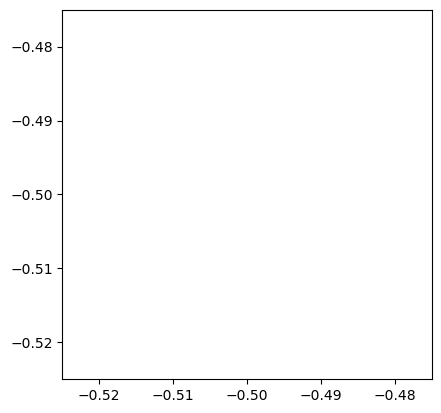

In [32]:
#fig, ax = plt.subplots()
#import numpy as np
#a = np.random.random((16, 16))

a = positive.corr()

plt.imshow(a)
plt.show()

In [317]:
#
ls = positive.seq.map(len).value_counts()#.unique()
ls


13     2854
20     2409
12     2146
15     2140
18     1913
       ... 
376       1
431       1
425       1
379       1
598       1
Name: seq, Length: 509, dtype: int64

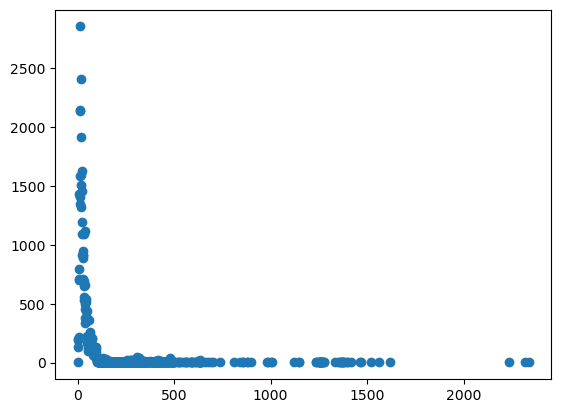

In [318]:
## sequence lengths
ls = positive.seq.map(len).value_counts()
fig, ax = plt.subplots()
ax.scatter(list(ls.index), ls.values)
#ax.set_xscale('log')


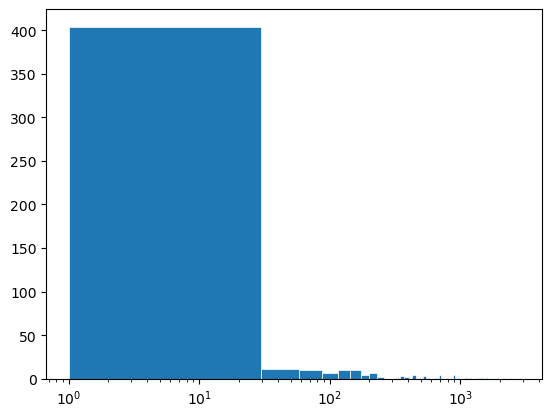

In [319]:
## sequence lengths
ls = positive.seq.map(len).value_counts()
fig, ax = plt.subplots()
ax.hist(ls, bins = 100, linewidth=0.5, edgecolor="white")
ax.set_xscale('log')



In [164]:
"""

import matplotlib.colors as colors

cmap = plt.colormaps["tab20c"]
def make_newcmap(cmap, minval, maxval, n):
        new_cmap = colors.LinearSegmentedColormap.from_list(
                'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
                cmap(np.linspace(minval, maxval, n)))
        return new_cmap
new_cmap = make_newcmap(cmap, 0, 3, 6)

inner_colors = new_cmap

"""


'\n\nimport matplotlib.colors as colors\n\ncmap = plt.colormaps["tab20c"]\ndef make_newcmap(cmap, minval, maxval, n):\n        new_cmap = colors.LinearSegmentedColormap.from_list(\n                \'trunc({n},{a:.2f},{b:.2f})\'.format(n=cmap.name, a=minval, b=maxval),\n                cmap(np.linspace(minval, maxval, n)))\n        return new_cmap\nnew_cmap = make_newcmap(cmap, 0, 3, 6)\n\ninner_colors = new_cmap\n\n'

In [338]:
inner = np.histogram(ls, bins=3)
inner

(array([54073,    90,     5]),
 array([1.00000000e+00, 7.79666667e+02, 1.55833333e+03, 2.33700000e+03]))

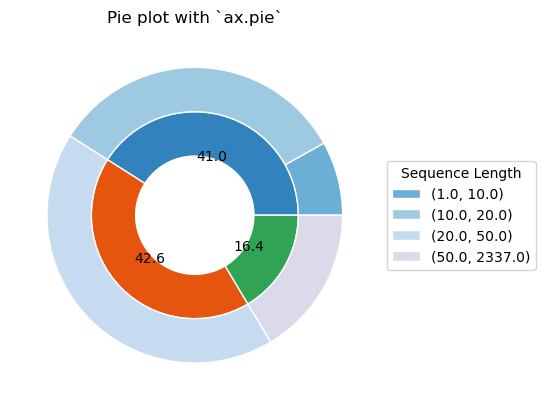

In [342]:
fig, ax = plt.subplots()

size = 0.3
vals = ls_split

ls = positive.seq.map(len)
outer = np.histogram(ls, [1.00000000e+00, 2e+01, 5e+01,  2.33700000e+03])
inner = np.histogram(ls, [1.00000000e+00, 1e+01, 2e+01, 5e+01,  2.33700000e+03] )

cmap = plt.colormaps['tab20c']#["viridis"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = np.vstack( (cmap([1, 2, 3, 15, 14]) , cmap(np.arange(3)*4)[1:])  )


def labeling(x):
    return f'{x:.1f}'#%\n({absolute:d} g)"
# in ax
l_labels = list(zip ( inner[1][:-1], inner[1][1:] ) ) 

# if want labeling add in ,autopct=lambda x: labeling(x), need one more variable unpacked

wedges, text, autotexts = ax.pie(outer[0], radius=1-size, colors=outer_colors, autopct=lambda x: labeling(x),
       wedgeprops=dict(width=size, edgecolor='w'))

wedgesi, autotexts = ax.pie(inner[0], radius=1, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

ax.legend(wedgesi, l_labels,# ingred like text
          title="Sequence Length",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.setp(autotexts, size=8, weight="bold")

plt.show()

In [376]:
ls.values

array([15, 10,  9, ..., 35, 11,  8])

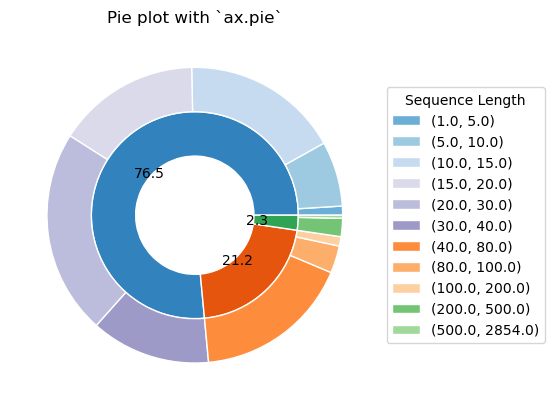

In [392]:
ls = positive.seq.map(len).values#.value_counts()



outer = np.histogram(ls, [1.000e+00, 4e+01, 2e+02, 2.854e+03])

inner = np.histogram(ls, bins = [1e+00, 5e+00, 1e+01, 15, 20, 3e+01, 4e+01, 8e+01, 1e+02, 2e+02, 5e+02, 2.854e+03])

fig, ax = plt.subplots()

size = 0.3

cmap = plt.colormaps['tab20c']#["viridis"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = np.vstack( (cmap([1, 2, 3, 15, 14, 13]) , cmap([5, 6, 7]), cmap([9, 10]))  )


def labeling(x):
    return f'{x:.1f}'#%\n({absolute:d} g)"
# in ax
l_labels = list(zip ( inner[1][:-1], inner[1][1:] ) ) 

# if want labeling add in ,autopct=lambda x: labeling(x), need one more variable unpacked

wedges, text, autotexts = ax.pie(outer[0], radius=1-size, colors=outer_colors, autopct=lambda x: labeling(x),
       wedgeprops=dict(width=size, edgecolor='w'))

wedgesi, autotexts = ax.pie(inner[0], radius=1, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

ax.legend(wedgesi, l_labels,# ingred like text
          title="Sequence Length",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.setp(autotexts, size=8, weight="bold")

plt.show()

In [ ]:

tab = pd.crosstab(
    index=df['region'],
    columns=df['gender'],
)

(0.0, 500.0)

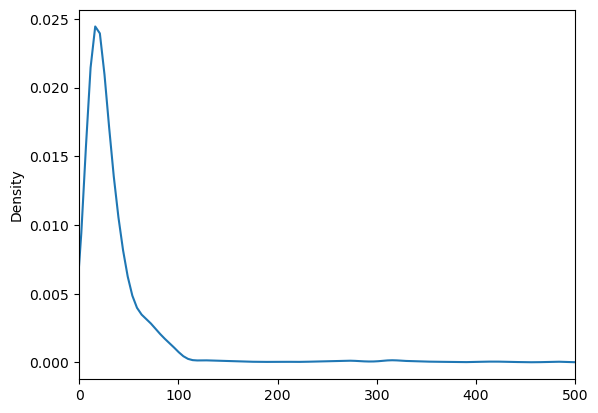

In [263]:
positive['seq'].map(len).plot(kind='kde')
plt.xlim(0, 500)


In [244]:
dflen = positive.copy()
dflen['seq_len'] = dflen.seq.map(len)
dflen.head(2)


,id,name,AB,description,OX,dataset,seq,seq_len
0,AVP0722,-AVP0722,1,None,alien,InverPep.fasta,NNLETTAFHRDDHET,15
1,BaAMPS_212,LF11-324,1,None,alien,InverPep.fasta,PFFWRIRIRR,10


In [242]:
positive.dataset.unique()

array(['InverPep.fasta', 'AntiTbPdb.html', 'BAAMPs_data.csv',
       'APD_sequence_release_09142020.fasta', 'dbaasp_ribosomal.txt',
       'peptaibol.html', 'HIPdb_data.xls', 'enzybase.fasta', 'DADP.html',
       'LAMP2.fasta', 'dbaasp_nonribosomal.txt', 'parapep.html',
       'dramp_antimicrobial.fasta'], dtype=object)

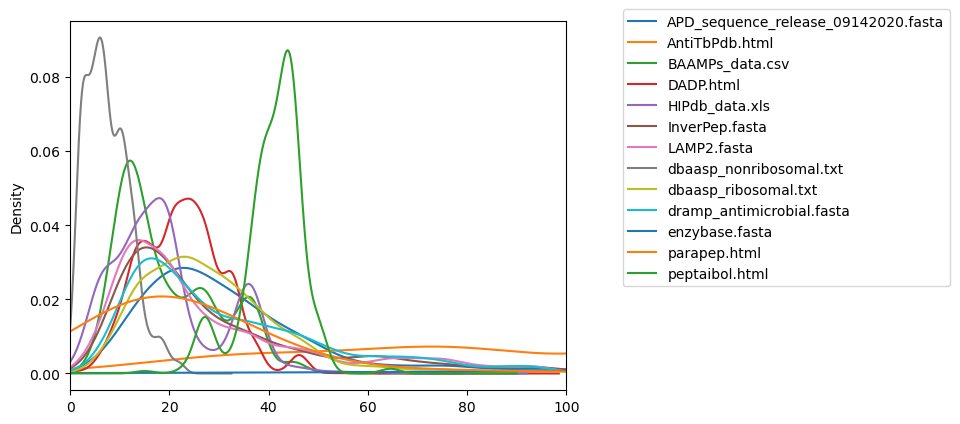

In [287]:
#dfgrouped = dflen.groupby('dataset')['seq_len'].plot(kind='kde')
# LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.



dflen.groupby('dataset')['seq_len'].plot(kind = 'kde')

plt.xlim(0, 100)

plt.legend(bbox_to_anchor=(1.1, 1.05))


In [ ]:
dflen[ dflen['dataset'].map(lambda x: x=='enzybase.fasta')  ]

In [760]:
print('shape before: ', dflen.shape)

dropdatasets = ['enzybase.fasta', 'parapep.html', 'dbaasp_nonribosomal.txt', 'peptaibol.html' ]
pos_f = dflen[dflen['dataset'].map(lambda x: x not in dropdatasets) ]
print('shape after dropping datasets: ', pos_f.shape)

pos_f = pos_f[pos_f['seq_len'] != 0 ]
print('shape after dropping len== 0: ', pos_f.shape)

pos_f = pos_f[pos_f['seq_len'] != 1 ]
print('shape after dropping len== 1: ', pos_f.shape)

pos_f = pos_f[pos_f['seq_len'] != 2 ]
print('shape after dropping len== 2: ', pos_f.shape)

pos_f = pos_f[pos_f['seq_len'] < 70 ]
print('shape after dropping len > 70: ', pos_f.shape)


shape before:  (54168, 8)
shape after dropping datasets:  (51740, 8)
shape after dropping len== 0:  (51740, 8)
shape after dropping len== 1:  (51734, 8)
shape after dropping len== 2:  (51630, 8)
shape after dropping len > 70:  (47986, 8)


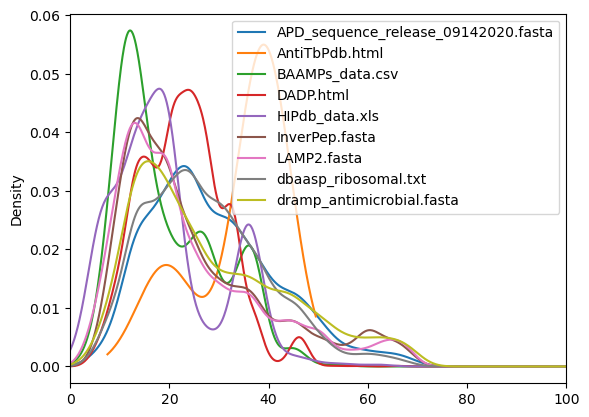

In [761]:
pos_f.groupby('dataset')['seq_len'].plot(kind = 'kde')

plt.xlim(0, 100)

plt.legend()

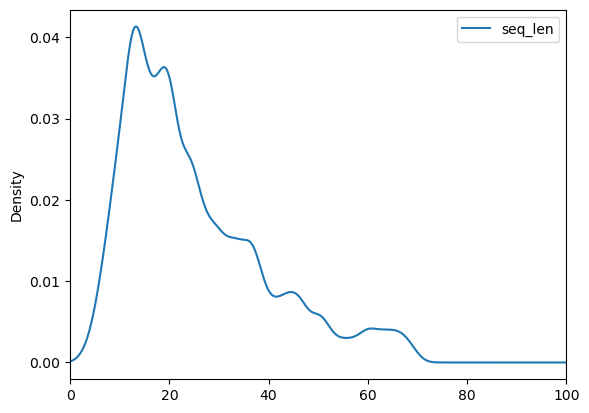

In [762]:
pos_f['seq_len'].plot(kind = 'kde')

plt.xlim(0, 100)

plt.legend()

## removing nn aacids (sequence)

In [763]:
import re

aadict = []

def aa_in_all_seq(s, aadict = aadict):# might have to add aadict = aadict
    s = s.strip(' ').strip('\n')
    
    aal = re.findall('[A-Z][^A-Z]*', s)# checking for aa notation
    #aal = re.findall( '(?<!,) [A-Z][^A-Z]*' ,s)
    #aal = re.findall('(?<![^\w\s]) [A-Z][^A-Z]* (?=(?:[^\w\s])*)', s)
    #aal = re.findall('[A-Z][^A-Z^\-]*', s)# checking for aa notation

    aadict += aal
    return s


In [764]:
pos_f.seq.map(aa_in_all_seq)
# [a for a in list(set(aadict)) if len(a) == 1] seems normal
aalen2 = [a for a in list(set(aadict)) if len(a) == 2]
aalen3 = [a for a in list(set(aadict)) if len(a) > 2]# elements dont seem to be three letter codes

drop_aa = aalen2+aalen3

In [765]:
print('df shape before deselecting nn aa: ', pos_f.shape)

drop_nn = lambda x: any( map(lambda v : v in drop_aa, re.findall('[A-Z][^A-Z]*', x) ) )

pos_f = pos_f[ np.invert( pos_f.seq.map(drop_nn) ) ]

print('df shape after deselecting nn aa: ', pos_f.shape)

df shape before deselecting nn aa:  (47986, 8)
df shape after deselecting nn aa:  (47162, 8)


In [591]:
pos_f.seq.values

array(['NNLETTAFHRDDHET', 'PFFWRIRIRR', 'ADADDDDDK', ...,
       'SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKELK',
       'SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKEL',
       'ISGINASVVNIQKEIDRLNEVAKNLNESLIDLQEL'], dtype=object)

In [600]:
pos_f.seq.map(aa_in_all_seq)
# run function with initialisation of new list = aadictnew
print(len(aadictnew))
set(aadictnew)

1183775


{'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z'}

In [615]:
aadist = pd.Series(aadictnew)
aadist = aadist.value_counts()


In [ ]:
# in ax
l_labels = list(zip ( inner[1][:-1], inner[1][1:] ) ) 

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

ax.legend(wedgesi, l_labels,# ingred like text
          title="Sequence Length",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

In [724]:
summeddists = np.append(aadist.values[:-6], sum(aadist.values[-6:]) )
summeddistslabels = list( aadist.index[:-6] )+['X, O, Z, B, U, J' ]

In [730]:
labeldistance = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
#?

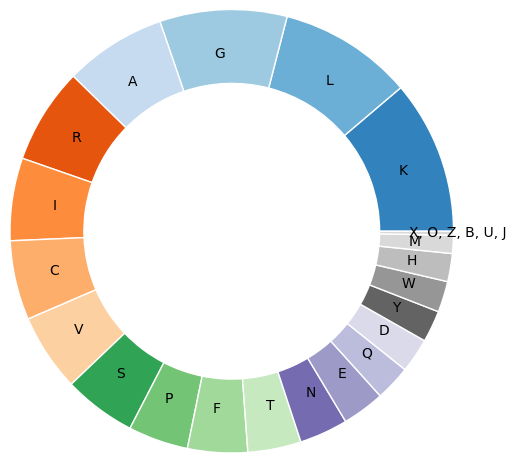

In [731]:
cmap = plt.colormaps['tab20c']
outer_colors = cmap(np.arange(21))

fig, ax = plt.subplots()
size = 0.5
wedges, text = ax.pie(summeddists, radius=1.5, colors=outer_colors, 
                      labels=summeddistslabels, labeldistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))




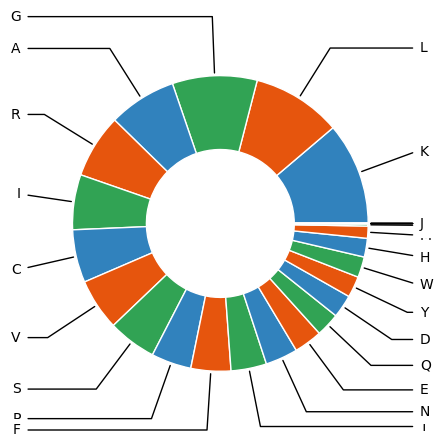

In [641]:
fig, ax = plt.subplots()
size = 0.5
wedges, text = ax.pie(aadist.values, radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(aadist.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

## duplicates



In [766]:
pos_f_nodup = pos_f.drop_duplicates(subset=['seq'])
pos_f_nodup.shape

(21336, 8)

(0.0, 100.0)

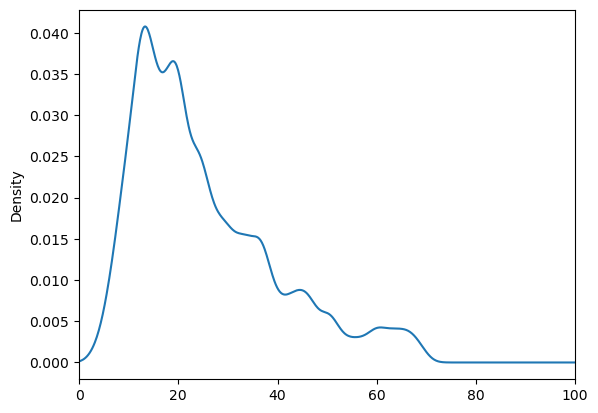

In [769]:
pos_f.seq_len.plot(kind='kde')
plt.xlim(0, 100)

(0.0, 100.0)

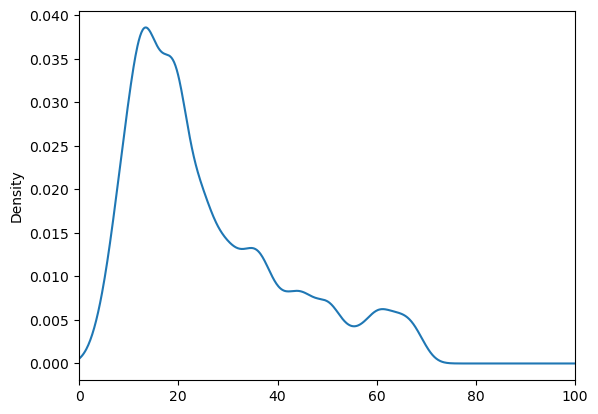

In [770]:
pos_f_nodup.seq_len.plot(kind='kde')
plt.xlim(0, 100)

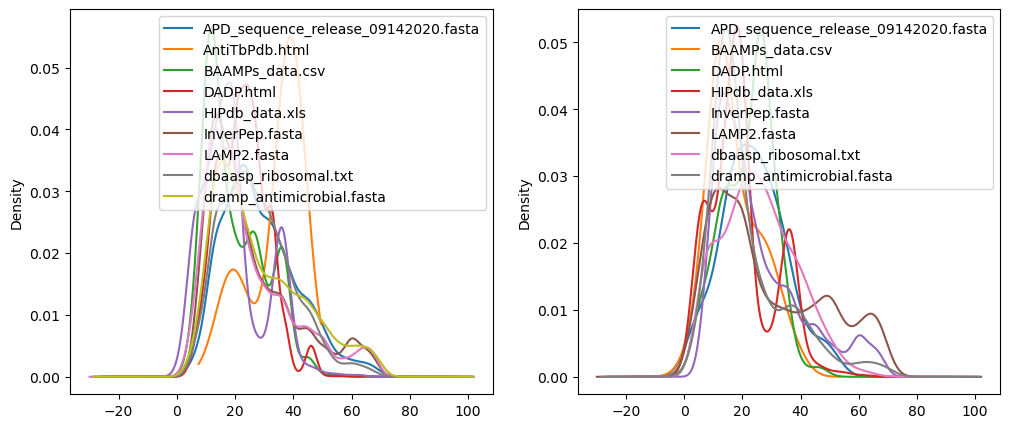

In [776]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

pos_f.groupby('dataset')['seq_len'].plot(kind = 'kde', ax = ax[0])
ax[0].legend()
pos_f_nodup.groupby('dataset')['seq_len'].plot(kind = 'kde', ax = ax[1])
ax[1].legend()



# Negative Samples
from uniprot -> siwssprot

https://www.uniprot.org/uniprotkb?query=reviewed:true

lenght -200

protein experimental


The value 'Experimental evidence at protein level' indicates that there is clear experimental evidence for the existence of the protein. The criteria include partial or complete Edman sequencing, clear identification by mass spectrometry, X-ray or NMR structure, good quality protein-protein interaction or detection of the protein by antibodies.

The value 'Experimental evidence at transcript level' indicates that the existence of a protein has not been strictly proven but that expression data (such as existence of cDNA(s), RT-PCR or Northern blots) indicate the existence of a transcript.

The value 'Protein inferred by homology' indicates that the existence of a protein is probable because clear orthologs exist in closely related species.

The value 'Protein predicted' is used for entries without evidence at protein, transcript, or homology levels.

The value 'Protein uncertain' indicates that the existence of the protein is unsure.


In [733]:
#for fasta swissprot
"""
sp|UniqueIdentifier|EntryName 
OX = organism identifier
GN = gene name
PE = protein existence
SV = version number of sequence
"""
def swissprottopd(infile, ofile):
  with open(infile, 'r') as inf:
    flines = inf.readlines()

    print('input file', infile)

    seqs = {}
    lastname = 'None'

    for l in flines:
      if l[0]=='>':# sequence identifier
        id, rest = l.strip('>sp|') .split('|', 1)
        name, rest = rest.split(' ', 1)
        desc, org = rest.split('OS=', 1)

        # need initialisation as have multiline sequences that require +=
        org = org.split(' PE')[0]
        seq = {'id':id, 'name':name, 'AB':0, 'description':desc, 'OX': org, 'dataset':infile, 'seq':''}
        seqs[name] = seq
        lastname = name

      else:
        seq = seqs[lastname]
        seq['seq'] += l.strip('>').strip('\n').strip(' ')
        #print(seq['seq'], len( seq['seq']) )

  inf.close()

  df = pd.DataFrame.from_dict(seqs, orient='index')#.transpose()
  return df

In [734]:
negative = swissprottopd('uniprot_swissprot.fasta', 'uniprot_swissprot')
print(negative.shape)
negative.head(3)


input file uniprot_swissprot.fasta
(31975, 7)


,id,name,AB,description,OX,dataset,seq
CA18_CONBE,A0A068B6Q6,CA18_CONBE,0,Conotoxin Bt1.8 (Fragment),Conus betulinus OX=89764,uniprot_swissprot.fasta,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG
BRKP2_PHYNA,A0A088MIT0,BRKP2_PHYNA,0,Bradykinin-related peptides,Physalaemus nattereri OX=248869 GN=BBN,uniprot_swissprot.fasta,MAFLKKSLFLVLFLGVVSLSFCEEEKREEHEEEKRDEEDAESLGKR...
DEFCO_COPCI,A0A097PTA8,DEFCO_COPCI,0,Fungal defensin copsin,Coprinopsis cinerea OX=5346,uniprot_swissprot.fasta,MKLSTSLLAIVAVASTFIGNALSATTVPGCFAECIDKAAVAVNCAA...


In [312]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31975 entries, CA18_CONBE to AP_FRAAN
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           31975 non-null  object
 1   name         31975 non-null  object
 2   AB           31975 non-null  int64 
 3   description  31975 non-null  object
 4   OX           31975 non-null  object
 5   dataset      31975 non-null  object
 6   seq          31975 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [315]:
negative.describe()

,AB
count,31975.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [732]:

negative.seq.map(len).value_counts()

11     460
146    409
10     378
15     328
141    323
      ... 
5       36
6       33
4       23
3        5
2        2
Name: seq, Length: 199, dtype: int64

In [387]:
negative.seq.map(len).values.max()#.value_counts().index

200

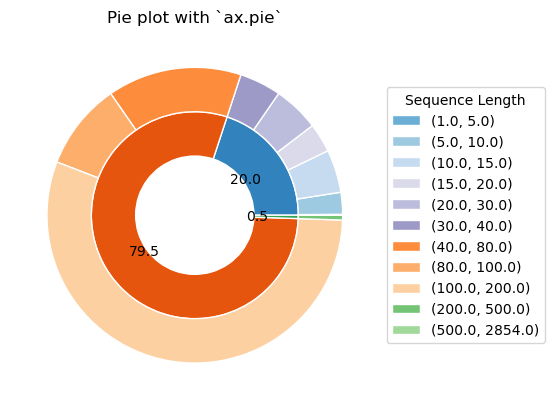

In [393]:
# ame bins as for positives. ? get non zero in bins > len 200?

ls = negative.seq.map(len).values#.value_counts()

outer = np.histogram(ls, [1.000e+00, 4e+01, 2e+02, 2.854e+03])
inner = np.histogram(ls, bins = [1e+00, 5e+00, 1e+01, 15, 20, 3e+01, 4e+01, 8e+01, 1e+02, 2e+02, 5e+02, 2.854e+03])

fig, ax = plt.subplots()

size = 0.3

cmap = plt.colormaps['tab20c']#["viridis"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = np.vstack( (cmap([1, 2, 3, 15, 14, 13]) , cmap([5, 6, 7]), cmap([9, 10]))  )



def labeling(x):
    return f'{x:.1f}'#%\n({absolute:d} g)"
# in ax
l_labels = list(zip ( inner[1][:-1], inner[1][1:] ) ) 

# if want labeling add in ,autopct=lambda x: labeling(x), need one more variable unpacked

wedges, text, autotexts = ax.pie(outer[0], radius=1-size, colors=outer_colors, autopct=lambda x: labeling(x),
       wedgeprops=dict(width=size, edgecolor='w'))

wedgesi, autotexts = ax.pie(inner[0], radius=1, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

ax.legend(wedgesi, l_labels,# ingred like text
          title="Sequence Length",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.setp(autotexts, size=8, weight="bold")

plt.show()

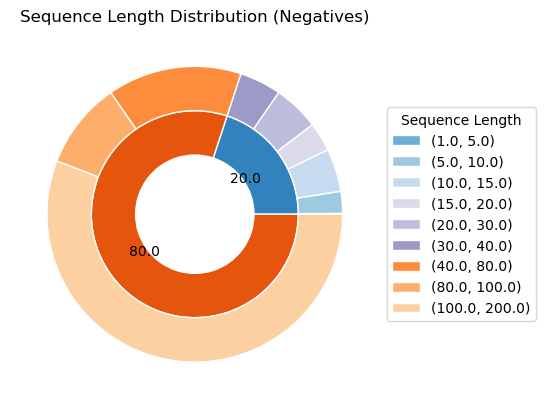

In [735]:
ls = negative.seq.map(len).values#.value_counts()
# removed slice of largest values (>200)

outer = np.histogram(ls, [1.000e+00, 4e+01, 2e+02])
inner = np.histogram(ls, bins = [1e+00, 5e+00, 1e+01, 15, 20, 3e+01, 4e+01, 8e+01, 1e+02, 2e+02])

fig, ax = plt.subplots()

size = 0.3

cmap = plt.colormaps['tab20c']#["viridis"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = np.vstack( (cmap([1, 2, 3, 15, 14, 13]) , cmap([5, 6, 7]) )  )



def labeling(x):
    return f'{x:.1f}'#%\n({absolute:d} g)"
# in ax
l_labels = list(zip ( inner[1][:-1], inner[1][1:] ) ) 

# if want labeling add in ,autopct=lambda x: labeling(x), need one more variable unpacked

wedges, text, autotexts = ax.pie(outer[0], radius=1-size, colors=outer_colors, autopct=lambda x: labeling(x),
       wedgeprops=dict(width=size, edgecolor='w'))

wedgesi, autotexts = ax.pie(inner[0], radius=1, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Sequence Length Distribution (Negatives)')

ax.legend(wedgesi, l_labels,# ingred like text
          title="Sequence Length",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.setp(autotexts, size=8, weight="bold")

plt.show()

In [ ]:
# filtering for aa as in positives
# discarding len(>70)

In [738]:
#aadictnew# from filtereed positive frame
print('df shape before deselecting nn aa: ', negative.shape)
drop_nn = lambda x: all( map(lambda v : v in aadictnew, re.findall('[A-Z][^A-Z]*', x) ) )

negative_n = negative[ negative.seq.map(drop_nn) ]

print('df shape after deselecting nn aa: ', negative_n.shape)

df shape before deselecting nn aa:  (31975, 7)
df shape after deselecting nn aa:  (31975, 7)


In [744]:
negative_aas = negative_n.seq.map(lambda x: set(re.findall('[A-Z][^A-Z]*', x ) ) )
negative_aas

CA18_CONBE         {Q, K, P, A, T, G, D, N, I, C, R, S, V, L, F}
BRKP2_PHYNA    {K, M, A, E, P, T, G, Y, D, I, C, R, S, V, L, ...
DEFCO_COPCI    {Q, K, M, T, A, P, E, G, D, I, N, C, R, S, V, ...
SRBP1_CUCSA    {M, R, S, V, L, H, E, N, F, G, Y, D, I, C, Q, ...
NDB4S_ANDCR    {M, R, S, V, L, H, E, P, N, F, Y, G, D, I, C, ...
                                     ...                        
Y1570_THEMA    {M, R, S, V, L, H, E, P, N, F, Y, G, D, I, Q, ...
BRIX_AERPE     {W, K, M, P, T, A, E, G, Y, D, I, N, R, S, V, ...
Y803_CHLPN     {M, R, S, V, L, H, E, P, N, F, G, Y, D, I, C, ...
Y812_RICPR     {Q, E, M, A, K, P, T, G, Y, D, I, N, S, V, L, ...
AP_FRAAN       {M, R, S, V, L, H, E, P, N, F, G, Y, D, I, C, ...
Name: seq, Length: 31975, dtype: object

In [860]:
print(negative_n.shape)
negative_n = negative_n[ negative_n.seq.map(len) < 70 ]#.index #& df.seq.map(len) > 4] 
negative_n = negative_n[ negative_n.seq.map(len) > 2 ]#.index #& df.seq.map(len) > 4] 
print(negative_n.shape)


(8676, 8)
(8674, 8)


In [777]:
negative_n['seq_len'] = negative_n.seq.map(len)
negative_n.head(2)

,id,name,AB,description,OX,dataset,seq,seq_len
CA18_CONBE,A0A068B6Q6,CA18_CONBE,0,Conotoxin Bt1.8 (Fragment),Conus betulinus OX=89764,uniprot_swissprot.fasta,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,37
PIOS1_HUMAN,A0A0B4J2F0,PIOS1_HUMAN,0,Protein PIGBOS1,Homo sapiens OX=9606 GN=PIGBOS1,uniprot_swissprot.fasta,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,54


In [778]:
print(negative_n.shape)
negative_n = negative_n.drop_duplicates(subset=['seq'])
print(negative_n.shape)


(9740, 8)
(8676, 8)


## resampling to match length distribution

In [782]:
import scipy.stats as stats


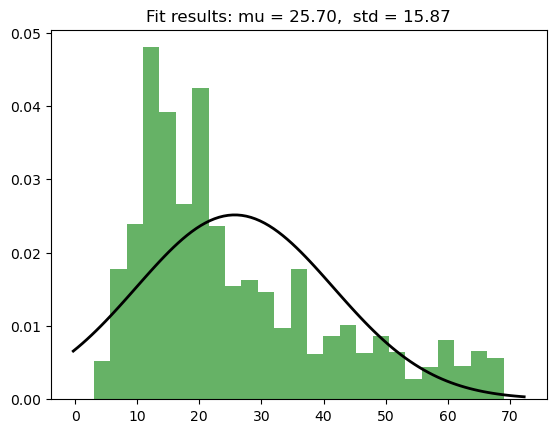

In [784]:

# Fit a normal distribution to the data:
p_seq_len = pos_f_nodup.seq_len
mu, std = stats.norm.fit(p_seq_len)

# Plot the histogram.
plt.hist(p_seq_len, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

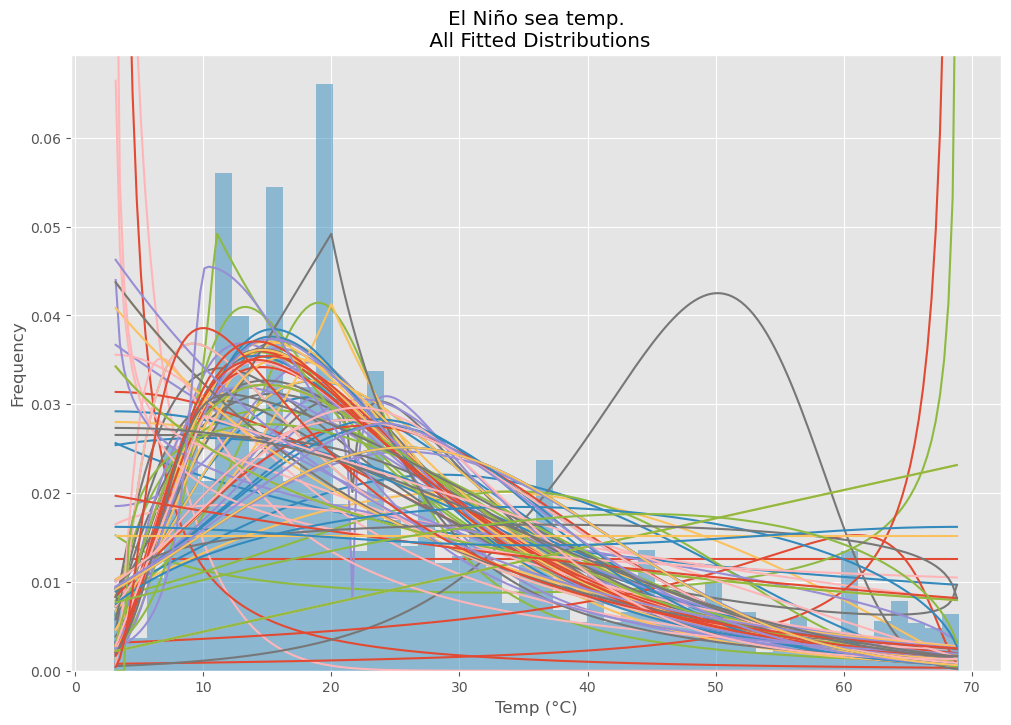

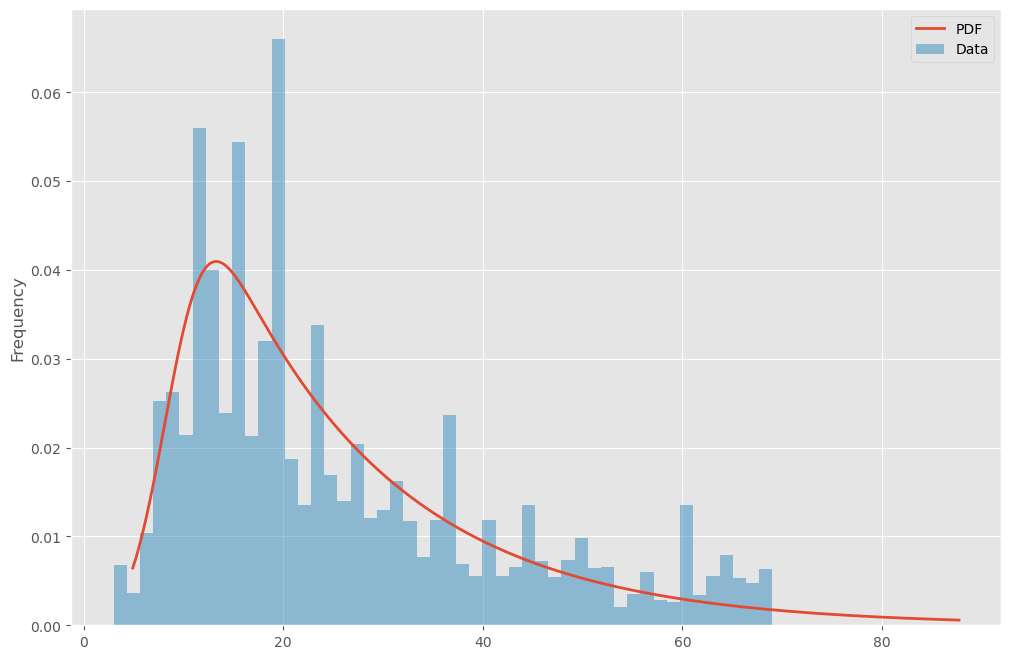

In [789]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pos_f_nodup.seq_len

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)
print(param_names, param_str, dist_str)

['K', 'loc', 'scale'] K=5.50, loc=8.58, scale=3.12 exponnorm(K=5.50, loc=8.58, scale=3.12)


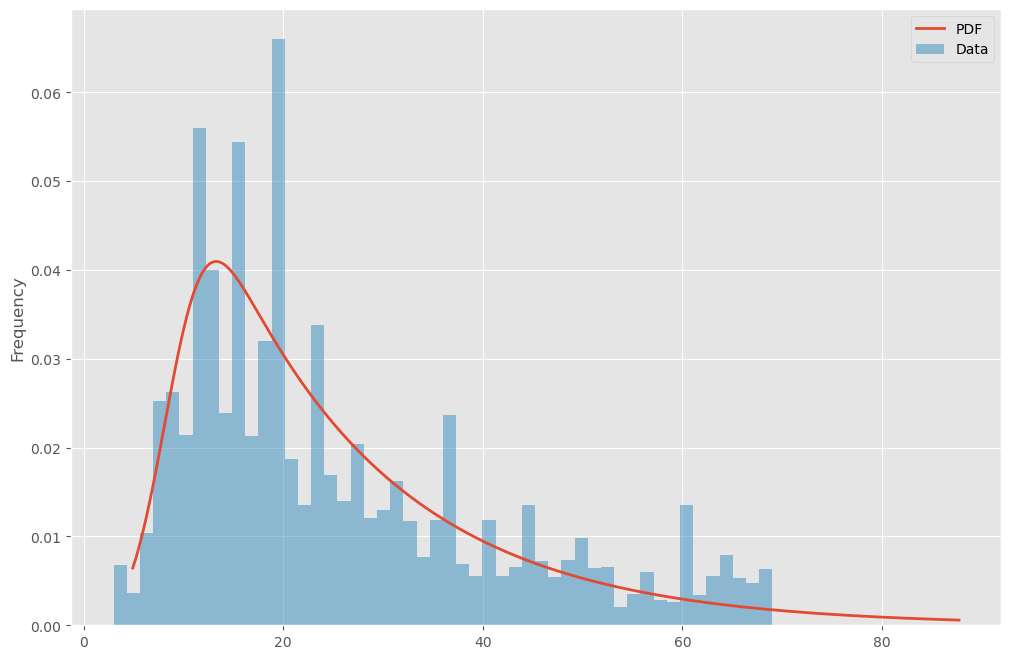

In [803]:
# Make PDF with best params 
data = pos_f_nodup.seq_len
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)
print(param_names, param_str, dist_str)

In [863]:
dist, params = best_dist[0], best_dist[1]
print('sse:', best_dist[2])

arg = params[:-2]
loc = params[-2]
scale = params[-1]

size = 1000

x = np.linspace(0, 100, size)
y = dist.pdf(x, loc=loc, scale=scale, *arg)
pdf = pd.Series(y, x)


sse: 0.16254784985329357


In [800]:
# [d for d in _distn_names] exponnerm


In [864]:
# for negative

data = negative_n.seq_len

distribution = getattr(st, 'exponnorm')

# Ignore warnings from data that can't be fit
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    
    # fit dist to data
    params = distribution.fit(data)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # Calculate fitted PDF and error with fit in distribution
    pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))

negative_best_dist = (distribution, params, sse)
        

['K', 'loc', 'scale'] K=0.31, loc=28.46, scale=18.53 exponnorm(K=0.31, loc=28.46, scale=18.53)


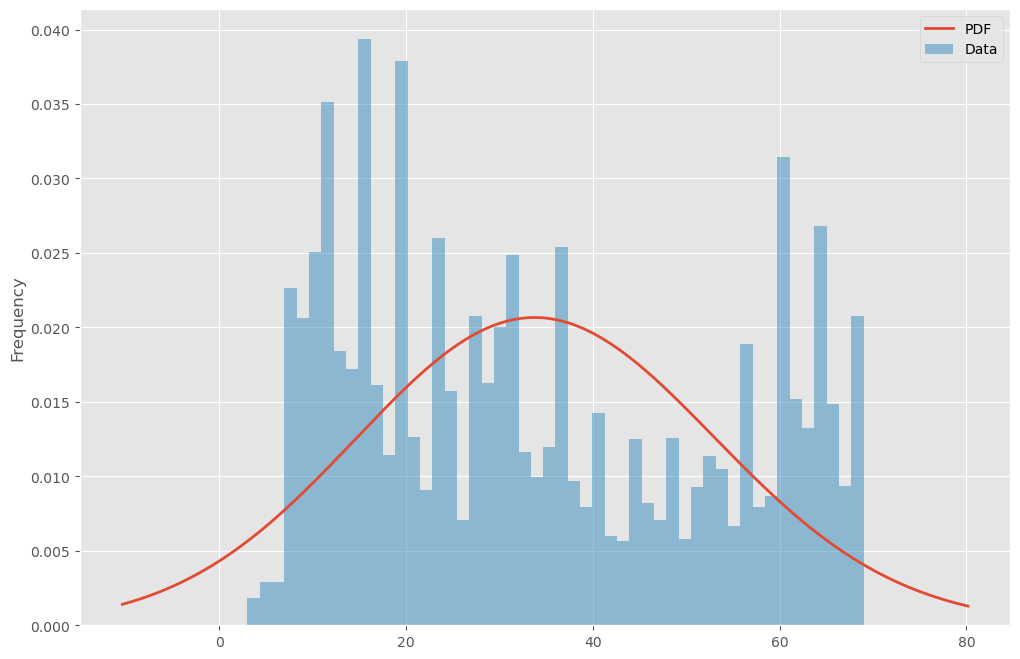

In [862]:
pdf = make_pdf(negative_best_dist[0], negative_best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (negative_best_dist[0].shapes + ', loc, scale').split(', ') if negative_best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, negative_best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)
print(param_names, param_str, dist_str)

In [ ]:
# https://stats.stackexchange.com/questions/634940/resample-from-a-sample-to-match-a-desired-distribution



In [856]:
# pos exponnorm(K=5.50, loc=8.58, scale=3.12)
x = np.arange(3, 80)
pdist = dist.pdf(x, K = 5.50, loc=8.58, scale=3.12)
# neg K=0.31, loc=28.46, scale=18.53)
ndist = dist.pdf(x, K=0.31, loc=28.46, scale=18.53)


# TODO: chose ndist as have fever samples but to be contemplated

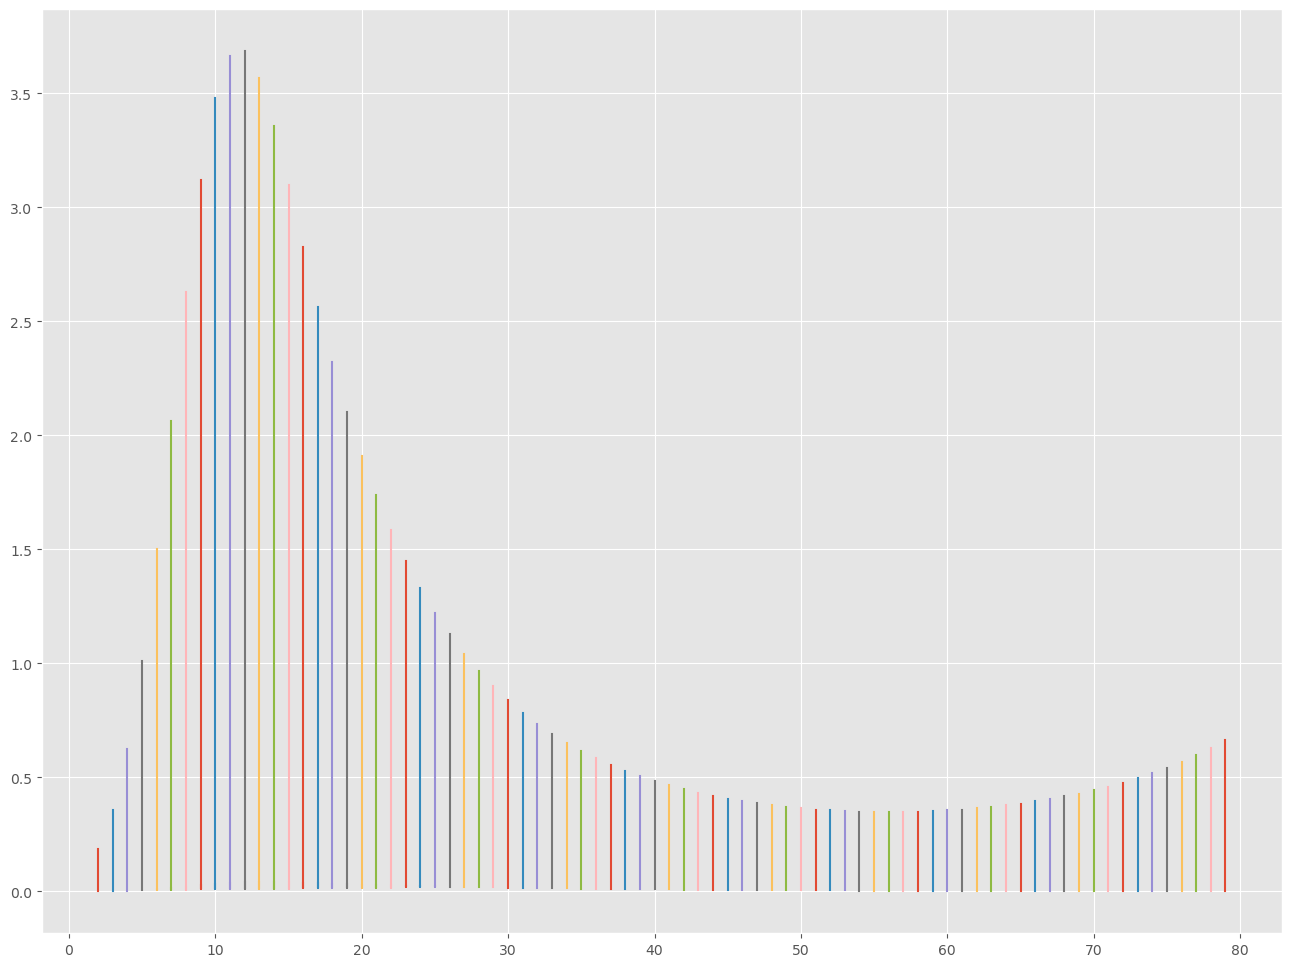

In [848]:
plt.plot([x, x, x], [pdist, ndist, ndist/pdist])

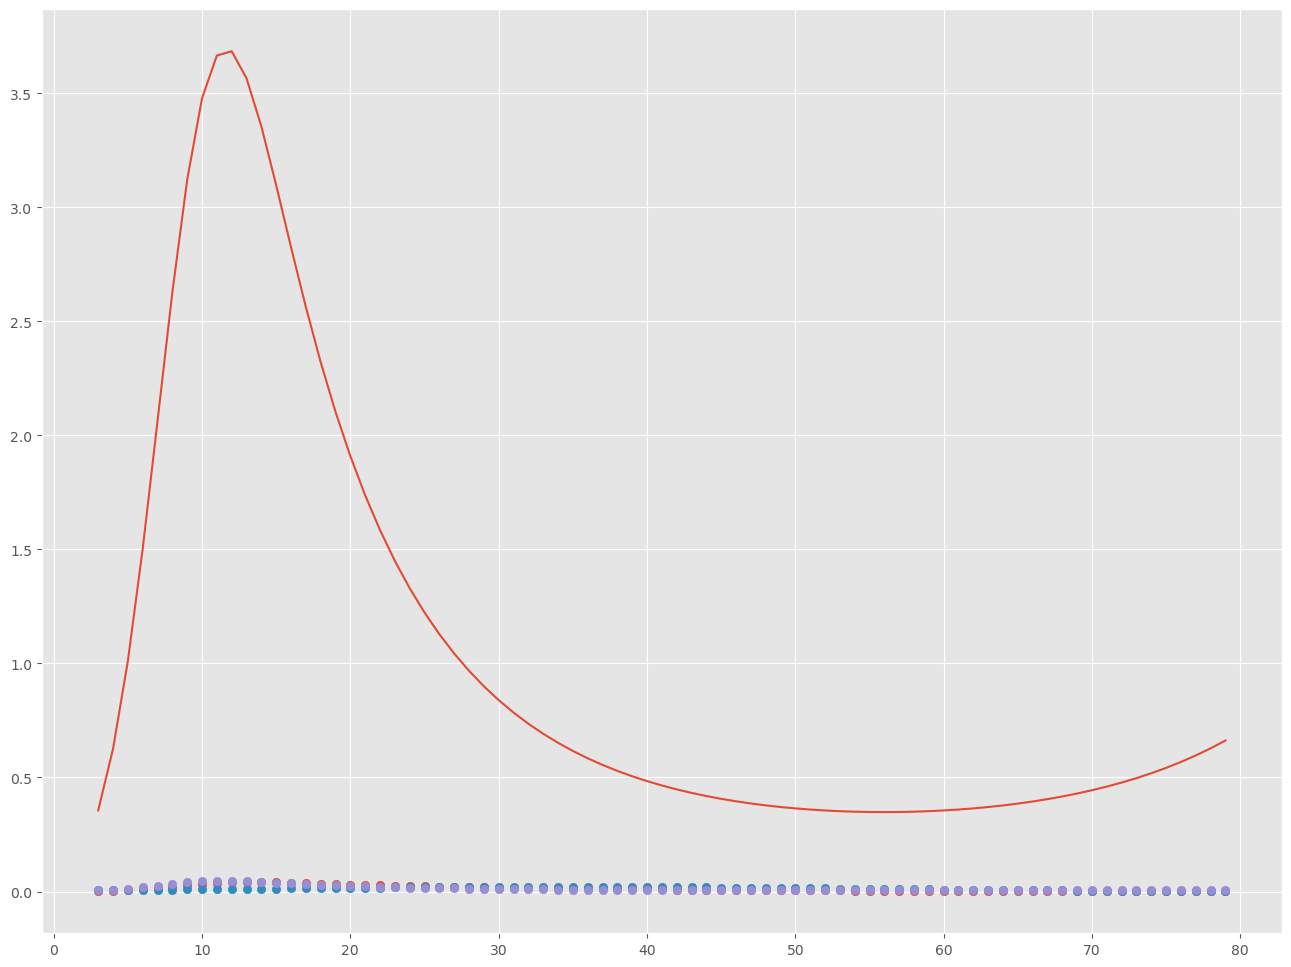

In [857]:
plt.plot(x,  pdist/ndist)
plt.scatter(x,  pdist)
plt.scatter(x, ndist)
plt.scatter(x, pdist/ndist/sum(pdist/ndist))


#sample(x, size=1000, replace=T, prob = pxq)

In [858]:
reldist = ndist/pdist/sum(ndist/pdist)
print('sum reldist: ', sum(reldist) )
reldist

sum reldist:  1.0000000000000002


array([0.02135872, 0.01213555, 0.00751239, 0.00505275, 0.00367968,
       0.00288912, 0.00243277, 0.00218293, 0.00207148, 0.0020609 ,
       0.00212945, 0.00226328, 0.00245219, 0.00268772, 0.00296274,
       0.00327167, 0.00361069, 0.0039776 , 0.0043713 , 0.00479136,
       0.00523755, 0.00570965, 0.00620727, 0.00672979, 0.00727635,
       0.00784584, 0.00843685, 0.0090477 , 0.00967643, 0.01032079,
       0.01097827, 0.01164609, 0.01232122, 0.0130004 , 0.01368019,
       0.01435694, 0.01502687, 0.01568609, 0.01633065, 0.01695654,
       0.01755977, 0.01813642, 0.01868264, 0.01919474, 0.0196692 ,
       0.02010274, 0.02049233, 0.02083525, 0.02112911, 0.02137187,
       0.0215619 , 0.02169797, 0.02177924, 0.02180534, 0.02177629,
       0.02169257, 0.02155506, 0.02136505, 0.0211242 , 0.02083456,
       0.02049848, 0.02011865, 0.01969798, 0.01923965, 0.01874701,
       0.01822357, 0.01767293, 0.01709878, 0.01650484, 0.01589479,
       0.0152723 , 0.01464095, 0.01400419, 0.01336536, 0.01272

In [819]:
# https://stackoverflow.com/questions/74397847/how-to-randomly-sample-from-a-datafframe-while-preserving-the-distribution-in-py

# might want to use on positives? df['num_legs'].sample(n=3, random_state=1)

#negative_n.groupby(['seq_len']).sample(frac=reldist, replace=)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [904]:
n_psamples = (np.round ( reldist*negative_n.shape[0]) )
n_psamples

array([185., 105.,  65.,  44.,  32.,  25.,  21.,  19.,  18.,  18.,  18.,
        20.,  21.,  23.,  26.,  28.,  31.,  35.,  38.,  42.,  45.,  50.,
        54.,  58.,  63.,  68.,  73.,  78.,  84.,  90.,  95., 101., 107.,
       113., 119., 125., 130., 136., 142., 147., 152., 157., 162., 166.,
       171., 174., 178., 181., 183., 185., 187., 188., 189., 189., 189.,
       188., 187., 185., 183., 181., 178., 175., 171., 167., 163., 158.,
       153., 148., 143., 138., 132., 127., 121., 116., 110., 105.,  99.])

In [905]:
pos_f_nodup.groupby(['seq_len']).count()

,id,name,AB,description,OX,dataset,seq
seq_len,,,,,,,
3,70,70,70,13,57,70,70
4,120,120,120,14,113,120,120
5,103,103,103,28,96,103,103
6,293,293,293,212,269,293,293
7,351,350,351,216,322,351,351
...,...,...,...,...,...,...,...
65,96,96,96,55,96,96,96
66,150,150,150,97,150,150,150
67,135,135,135,61,135,135,135


In [906]:
pos_f_nodup.groupby(['seq_len']).value_counts()

seq_len  id             name                 AB  description                                                                                          OX                      dataset                              seq                                                                  
4        108            (RW)2-NH2            1   gram neg                                                                                             Escherichia coli RP437  BAAMPs_data.csv                      RWRW                                                                     1
         2261           Brevifactin          1   (lipopeptides; bacteria; XXL)\n                                                                      alien                   APD_sequence_release_09142020.fasta  PLGG                                                                     1
         2383           Gageotetrin          1   C (nonribosomally synthesized peptide antibiotic; lipopeptides; marine bacteria, prokaryote; XXL)\

In [907]:
#agginfo = negative_n.groupby(['seq_len']).apply(lambda x: list(x.seq_len, x.id) )
groups = pos_f_nodup.groupby(['seq_len']).groups # len, name
groups

{3: [22851, 22852, 22853, 22854, 22855, 22856, 22857, 22858, 22859, 22860, 22861, 22862, 22863, 30814, 30828, 31358, 31359, 31360, 31361, 31362, 31531, 31541, 31542, 31652, 32005, 32409, 32627, 32628, 33416, 33417, 35237, 35513, 35649, 36157, 36503, 36557, 36604, 36779, 36780, 36859, 36875, 37351, 37357, 37358, 37375, 37522, 37523, 37524, 37530, 37691, 37694, 37695, 37696, 37697, 37698, 37702, 42277, 43634, 43852, 45122, 45153, 45515, 45659, 45709, 45792, 45885, 46084, 46239, 47113, 47284], 4: [15978, 18053, 18152, 21160, 22864, 22865, 22866, 22867, 22868, 22869, 22870, 27051, 30827, 30942, 31017, 31269, 31271, 31273, 31532, 31888, 32004, 32049, 32350, 32365, 32625, 32626, 32777, 32778, 32779, 32780, 32781, 32782, 32783, 32784, 32785, 32786, 32787, 32790, 32791, 33414, 33418, 33419, 33420, 33421, 33422, 33423, 34340, 34947, 35018, 35019, 35146, 35330, 35511, 35512, 36090, 36096, 36097, 36170, 36504, 36506, 36507, 36508, 36510, 36669, 36840, 36842, 36843, 36844, 36845, 36846, 36847, 368

In [918]:
groups = pos_f_nodup.groupby(['seq_len'])['name'].agg(list)
groups

seq_len
3     [8783807, 8783807, 8783807, 9425262, 9485357, ...
4     [(RW)2-NH2, Brevifactin, Gageotetrin, Cyclotet...
5     [Cathepsin, EP5-1, EP2, EP3, RLID, XLAsp-P1, L...
6     [SCL-dpeptide6, Tryptophyllin-T2-5, Inhibitor3...
7     [L4K2W-4, SAAPanalog3, DefensinAllomyrinadicho...
                            ...                        
65    [InverPep_ANTIFP_1363, InverPep_ANTIFP_770, In...
66    [Nigrosin-OG20, Xenoxin-2, U15-lycotoxin-Ls1c,...
67    [InverPep_ANTIFP_791, Odorranain-F2, Q32ZG0_RA...
68    [InverPep_ANTIFP_809, Preprofallaxidin-5, delt...
69    [M-zodatoxin-Lt8e, WAP, Arminin, InverPep_ANTI...
Name: name, Length: 67, dtype: object

In [882]:
np.random.choice(groups.values[0], 3)[0]

'LAMP2_L13A11902'

In [912]:
#len(n_psamples)# 3-80

mod_n_psamples = n_psamples[:len(groups)]
len(mod_n_psamples)

67

In [925]:
nsample_names = []

updated_n_psamples = np.array(n_psamples)#.copy()
used_n_psamples = np.array(n_psamples)# by group set by default + neighbourign group
# not needed if only update first lower
 
def putinothers(j, left, updated_n_psamples, nsample_names):
    data = groups.values[j-1][int(updated_n_psamples[j-1]):]# would change to used_n_p if putinto more than one
    used = 0
    while updated_n_psamples[j-1] > 1 and left>0:
        nsample_names += data[used]
        used += 1
        updated_n_psamples[j-1] -= 1
    return left

    #updated_n_psamples[i+1] += v-len(data)


for i, v in enumerate(n_psamples):# values for len 3..80
    l = i+3
    v = int(v)
    data = groups.values[i]
    if len(data) < v and i>0:
        print(' length, want, have:', l, v, len(data))
        nsample_names += data
        updated_n_psamples[i] = 0 
        lo = putinothers(i, v-len(data), updated_n_psamples, nsample_names)


    else:
        nsample_names += data[:v]#np.random.choice(groups.values[0], v)
        updated_n_psamples[i] -= v 


 length, want, have: 47 171 154
 length, want, have: 48 174 118
 length, want, have: 49 178 89
 length, want, have: 51 183 181
 length, want, have: 52 185 98
 length, want, have: 53 187 87
 length, want, have: 54 188 58
 length, want, have: 55 189 100
 length, want, have: 56 189 78
 length, want, have: 57 189 92
 length, want, have: 58 188 79
 length, want, have: 59 187 73
 length, want, have: 61 183 89
 length, want, have: 62 181 96
 length, want, have: 63 178 157
 length, want, have: 64 175 126
 length, want, have: 65 171 96
 length, want, have: 66 167 150
 length, want, have: 67 163 135
 length, want, have: 68 158 83
 length, want, have: 69 153 96


In [928]:
df = pos_f_nodup[pos_f_nodup['name'].map(lambda x: x in nsample_names) ]
df.head(2)

,id,name,AB,description,OX,dataset,seq,seq_len
0,AVP0722,-AVP0722,1,None,alien,InverPep.fasta,NNLETTAFHRDDHET,15
1,BaAMPS_212,LF11-324,1,None,alien,InverPep.fasta,PFFWRIRIRR,10


<AxesSubplot:ylabel='Density'>

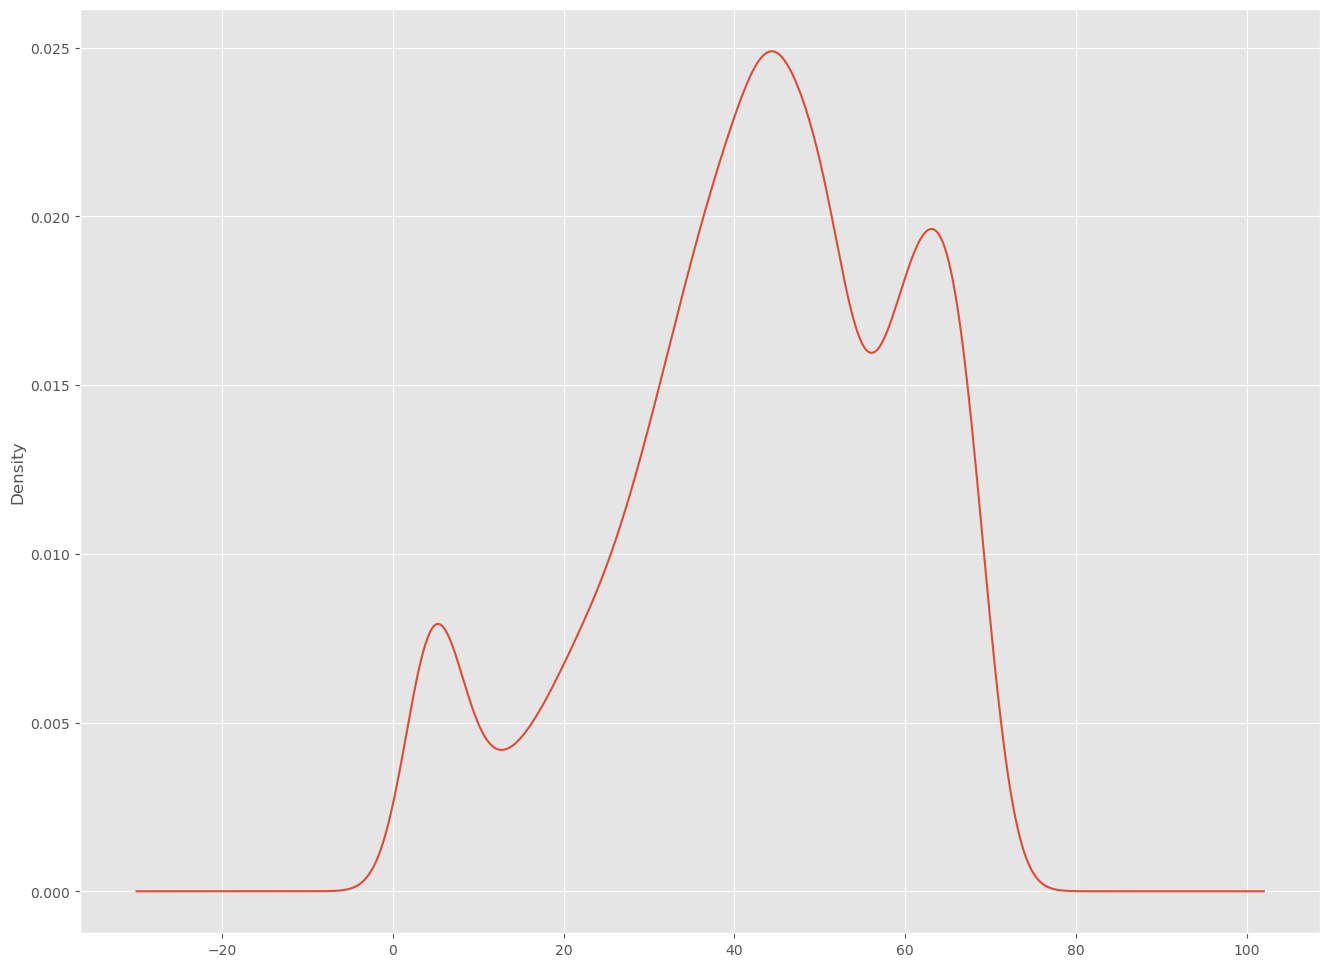

In [929]:
df.seq_len.plot(kind = 'kde')

## trying with sampling neg with pos distribution

In [931]:
reldist = pdist/sum(pdist)
n_psamples = (np.round ( reldist*negative_n.shape[0]) )


In [933]:
groups = negative_n.groupby(['seq_len'])['name'].agg(list)
groups

seq_len
3                                  [TRH_PIG, ACI_MACGN]
4     [OCP1_CALMC, OCP3_CALMC, FMRF_MACNI, TSCO1_AND...
5     [PAP2_PARMA, RBE31_LITRU, PENT_ANTYA, TY23_PIT...
6     [COW_CONCS, SAPP_SEPOF, PYF1_PENMO, TY3_ASCTR,...
7     [CUTI1_COLKA, FAR1_DELRA, FAR2_DELRA, FAR3_DEL...
                            ...                        
65    [LANA2_LACLL, HIRV1_HIRME, SCX4_LEIQU, SCX4_LE...
66    [SCX1_CENBA, SAMP2_HALVD, THIS_ECOLI, SCX2_CEN...
67    [RS28B_YEAST, RPAB5_HUMAN, D103A_HUMAN, CT5AS_...
68    [TX41A_SCOMU, NBDY_HUMAN, FIG01_BOARA, SCXD_CE...
69    [RPOY_BACSU, CSPE_ECOLI, CSPC_ECOLI, CA4A_CONS...
Name: name, Length: 67, dtype: object

In [935]:
nsample_names = []

updated_n_psamples = np.array(n_psamples)#.copy()
used_n_psamples = np.array(n_psamples)# by group set by default + neighbourign group
# not needed if only update first lower

##!!
n_psamples = n_psamples[:len(groups)]
 
def putinothers(j, left, updated_n_psamples, nsample_names):
    data = groups.values[j-1][int(updated_n_psamples[j-1]):]# would change to used_n_p if putinto more than one
    used = 0
    while updated_n_psamples[j-1] > 1 and left>0:
        nsample_names += data[used]
        used += 1
        updated_n_psamples[j-1] -= 1
    return left

    #updated_n_psamples[i+1] += v-len(data)


for i, v in enumerate(n_psamples):# values for len 3..80
    l = i+3
    v = int(v)
    data = groups.values[i]
    if len(data) < v and i>0:
        print(' length, want, have:', l, v, len(data))
        nsample_names += data
        updated_n_psamples[i] = 0 
        lo = putinothers(i, v-len(data), updated_n_psamples, nsample_names)


    else:
        nsample_names += data[:v]#np.random.choice(groups.values[0], v)
        updated_n_psamples[i] -= v 

 length, want, have: 4 34 19
 length, want, have: 5 59 33
 length, want, have: 6 95 33
 length, want, have: 7 141 86
 length, want, have: 8 193 173
 length, want, have: 9 246 236
 length, want, have: 10 293 287
 length, want, have: 11 329 227
 length, want, have: 12 351 175
 length, want, have: 13 361 211
 length, want, have: 14 359 197
 length, want, have: 15 349 311
 length, want, have: 16 335 140
 length, want, have: 17 318 185
 length, want, have: 18 302 131
 length, want, have: 19 285 157
 length, want, have: 21 254 145
 length, want, have: 22 239 104
 length, want, have: 23 226 137
 length, want, have: 24 213 161
 length, want, have: 25 201 180
 length, want, have: 26 190 81
 length, want, have: 27 179 114
 length, want, have: 28 169 124
 length, want, have: 32 134 131
 length, want, have: 34 119 114
 length, want, have: 41 79 65
 length, want, have: 42 75 69
 length, want, have: 43 70 65
 length, want, have: 45 63 56


In [938]:
len(nsample_names)#!

6432

<AxesSubplot:ylabel='Density'>

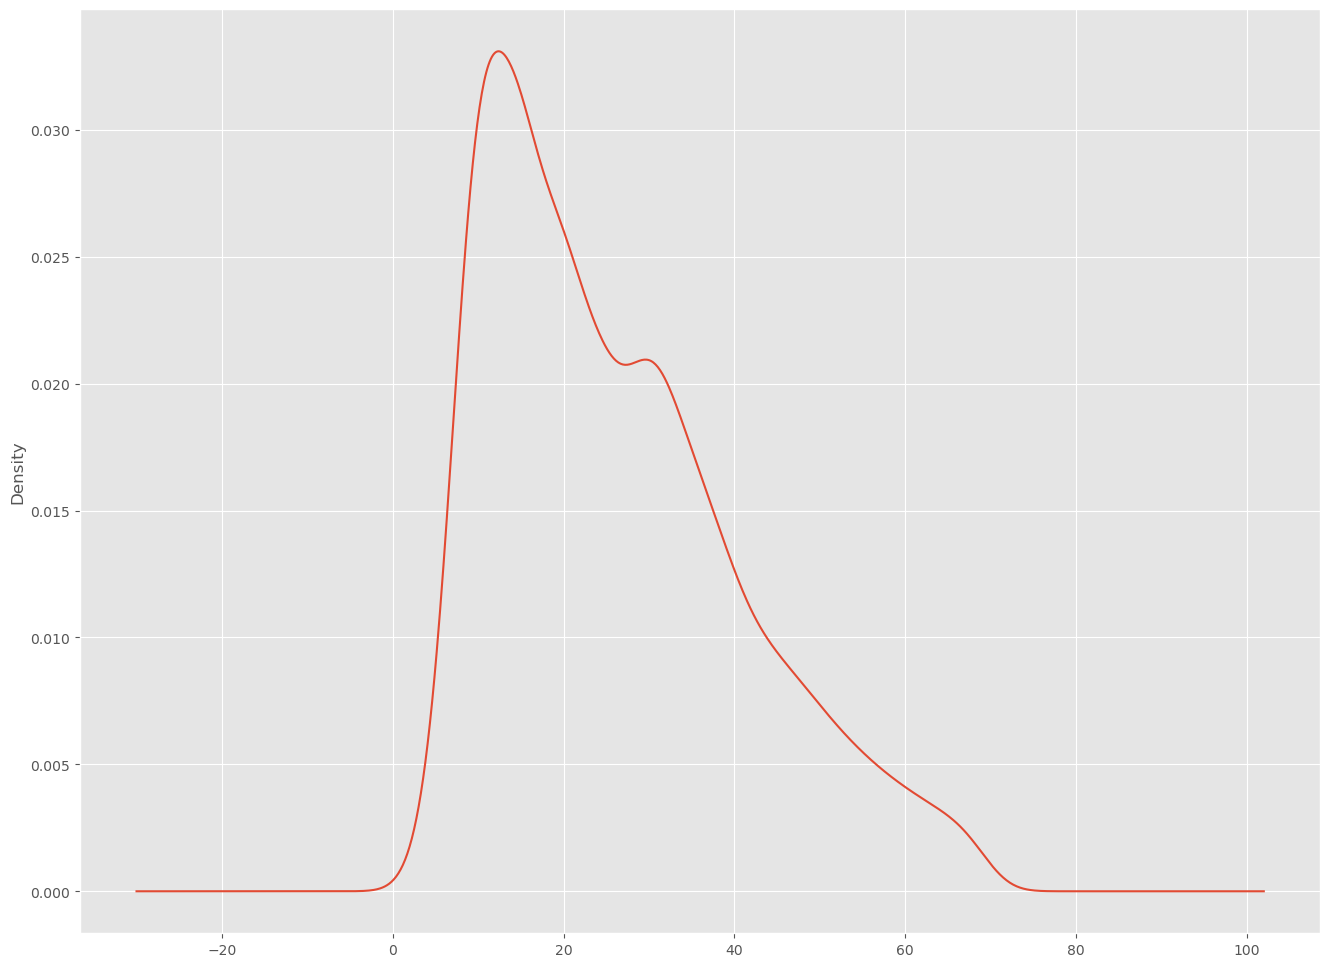

In [954]:
df_n = negative_n[negative_n['name'].map(lambda x: x in nsample_names) ]
df_n.head(2)

df_n.seq_len.plot(kind='kde')

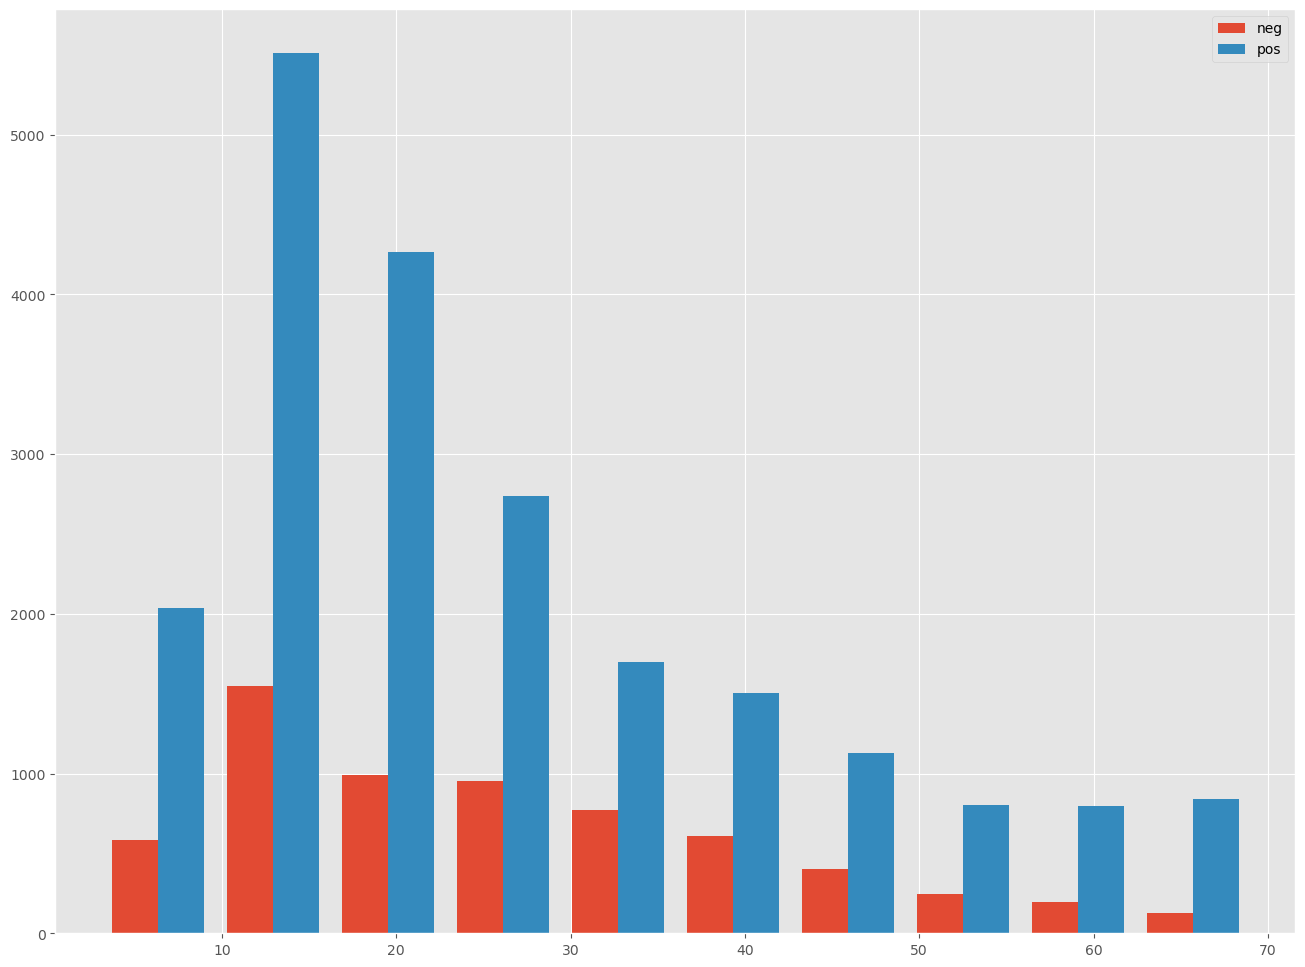

In [955]:
fig, ax = plt.subplots()

ax.hist([df_n.seq_len, pos_f_nodup.seq_len], label = ['neg', 'pos'])

ax.legend()


In [956]:
print(df_n.shape[0]/pos_f_nodup.shape[0])

0.3014623172103487


In [957]:
df_p = pos_f_nodup.sample(n=df_n.shape[0], random_state=1)
df_p.shape

(6432, 8)

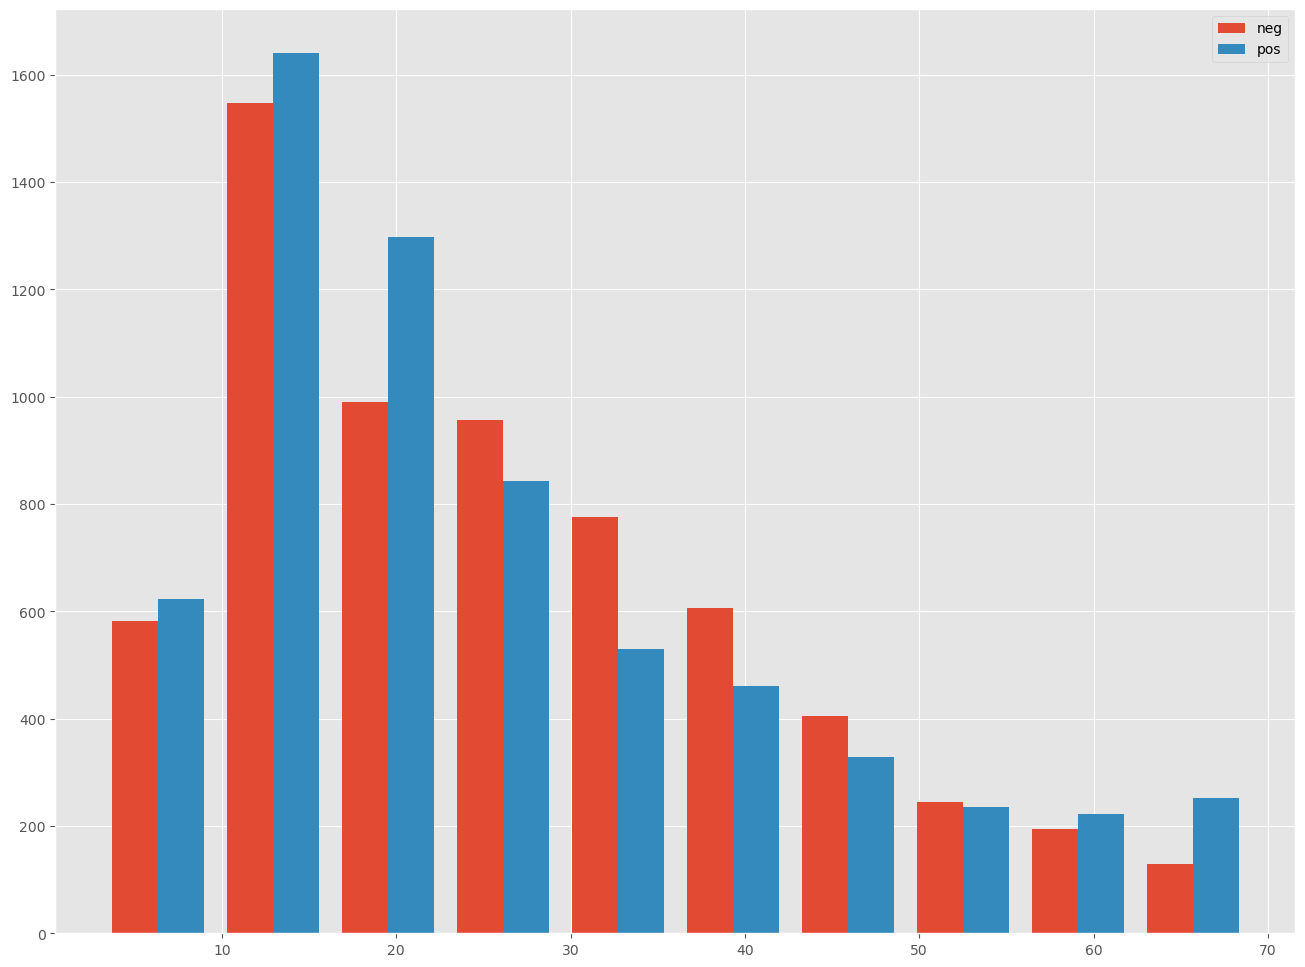

In [958]:
fig, ax = plt.subplots()

ax.hist([df_n.seq_len, df_p.seq_len], label = ['neg', 'pos'])

ax.legend()

In [959]:
df_n.head(2)

,id,name,AB,description,OX,dataset,seq,seq_len
CA18_CONBE,A0A068B6Q6,CA18_CONBE,0,Conotoxin Bt1.8 (Fragment),Conus betulinus OX=89764,uniprot_swissprot.fasta,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,37
PIOS1_HUMAN,A0A0B4J2F0,PIOS1_HUMAN,0,Protein PIGBOS1,Homo sapiens OX=9606 GN=PIGBOS1,uniprot_swissprot.fasta,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,54


In [960]:
df_p.head(2)

,id,name,AB,description,OX,dataset,seq,seq_len
3611,CANCERPPD_1906,FLAK-120C,1,None,alien,InverPep.fasta,FALALKAKKL,10
1795,ADAM_1718,InverPep_ADAM_1718,1,None,alien,InverPep.fasta,GGSVPCGESCVFIPCITSLAGCSCKNKVCYYD,32


In [963]:
print('dfp, dfn', df_p.shape, df_n.shape)
df = df_p.append(df_n, ignore_index=True)
print('df shape: ', df.shape)
df.head(2)

dfp, dfn (6432, 8) (6432, 8)
df shape:  (12864, 8)


/var/folders/c0/1q90pl8n3k50gnjpfmzf_lzh0000gn/T/ipykernel_29423/4075074843.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_p.append(df_n, ignore_index=True)


,id,name,AB,description,OX,dataset,seq,seq_len
0,CANCERPPD_1906,FLAK-120C,1,None,alien,InverPep.fasta,FALALKAKKL,10
1,ADAM_1718,InverPep_ADAM_1718,1,None,alien,InverPep.fasta,GGSVPCGESCVFIPCITSLAGCSCKNKVCYYD,32


In [964]:
ofile = 'data_pos_neg'
destin = ofile.split('.csv')[0]+'.csv'
df.to_csv(destin, index = False)
print('saved pd datafrae as csv to:', destin)


saved pd datafrae as csv to: data_pos_neg.csv
